# 主成分分析

注意：sklearn中的PCA方法默认使用协方差阵提取主成分，这一点和SPSS等统计软件不同（SPSS是利用相关系数阵进行）。

因此如果想要利用相关系数来，必要时应当先对数据做标化，标化后各类、特征标准差都为1，这时用协方差阵结果是一样的。

class sklearn.decomposition.PCA(

n_components = None : int/float/None/string，希望保留的主成分数量
    如果为None，则所有主成分均被保留，为'mle'时自动选择最佳数量（一般就设为None，后面再考虑减少）

copy = True
whiten = False : 输出的主成分是否*sqrt(n_samples)/特征根，即标准化（标化后的主成分标准差都为1，否则标准差就为特征值的平方根）
    该转换会损失部分方差信息，但有时候会使得后续的建模效果有所改善

svd_solver = 'auto' : {'auto', 'full', 'arpack', 'randomized'}
    auto : 根据X.shape和n_components自动选择方法
    full : 完整的SVD解法，即LAPACK
    arpack : ARPACK法，要求0 < n_components <  X的列数
    randomized : Halko等提出的随机SVD法
tol = 0.0, iterated_power = 'auto', random_state = None

)

sklearn.decomposition.PCA类的属性：

    components_ : array, 形如(n_components, n_features)，主成分系数矩阵
    explained_variance_ : array, 形如(n_components,)，各主成分解释的方差量，其实就是特征值或特征根
    explained_variance_ratio_ : array, 形如(n_components,)，各解释方差比例
    singular_values_ : array, 形如(n_components,)，各主成分对应的奇异值
    mean_ : array, 形如(n_features,)，各属性的均数，等价于X.mean(axis=1)
    n_components_ : int
    noise_variance_ : float，剩余的噪声协方差

sklearn.decomposition.PCA类的方法：

    fit(X[, y]) 
    fit_transform(X[, y])   
    get_covariance() : 给出模型的协方差阵
    get_params([deep])  
    get_precision() : 给出协方差矩阵的逆矩阵（Precision Matrix）
    inverse_transform(X)    
    score(X[, y]) : 给出样本的平均对数似然值
    score_samples(X) : 给出每个样本的对数似然值
    set_params(**params)
    transform(X)

In [1]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn import datasets
from matplotlib import pyplot as plt
iris = datasets.load_iris()

In [2]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(iris.data) #标化

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
# 使用标化后的数据，因此等价于采用相关系数阵做PCA
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
# 给出主成分系数矩阵，可以通过主成分系数矩阵计算主成分值
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [5]:
# 各主成分的方差解释量（特征值）（提取信息的大小就是用提取的方差大小或则说离散度的大小来衡量的）
pca.explained_variance_    


array([2.93808505, 0.9201649 ])

In [6]:
# 换算后的各主成分方差解释比例
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [7]:
Zdf = pd.DataFrame(X_scaled)#先将原始数据矩阵转为数据框
Zdf['z1'] = 0.52237162 * Zdf[0] - 0.26335492 * Zdf[1] \
            + 0.58125401 * Zdf[2] + 0.56561105 * Zdf[3]
Zdf['z2'] = 0.37231836 * Zdf[0] + 0.92555649 * Zdf[1] \
            + 0.02109478 * Zdf[2] + 0.06541577 * Zdf[3]
Zdf.describe()

,0,1,2,3,z1,z2
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15,-2.062054e-15,-2.300706e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.714061e+00,9.592883e-01
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,-2.771137e+00,-2.653466e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,-2.106054e+00,-5.989690e-01
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,4.157875e-01,1.687413e-02
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,1.344435e+00,5.996050e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,3.309919e+00,2.700123e+00


可见两个主成分mean=0，std=sqrt(特征根)

In [8]:
Zdf.head()

,0,1,2,3,z1,z2
0,-0.900681,1.019004,-1.340227,-1.315444,-2.261892,0.493483
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.085364,-0.662043
2,-1.385353,0.328414,-1.397064,-1.315444,-2.366237,-0.327348
3,-1.506521,0.098217,-1.283389,-1.315444,-2.302834,-0.583123
4,-1.021849,1.249201,-1.340227,-1.315444,-2.385810,0.661430


In [9]:
# 直接用transform()计算出主成分用于后续分析，
pca.transform(X_scaled)[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

练习：使用PCA方法对boston数据的自变量进行降维。

# 因子分析

https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html

class factor_analyzer.factor_analyzer.FactorAnalyzer(n_factors=3, rotation='promax', method='minres', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='median', svd_method='randomized', rotation_kwargs=None)

Optionally performs a rotation, with method including:

    varimax (orthogonal rotation)
    promax (oblique rotation)
    oblimin (oblique rotation)
    oblimax (orthogonal rotation)
    quartimin (oblique rotation)
    quartimax (orthogonal rotation)
    equamax (orthogonal rotation)


In [10]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn import datasets
from matplotlib import pyplot as plt
iris = datasets.load_iris()
irisdf=pd.DataFrame(iris.data, columns = iris.feature_names)

In [11]:
# 计算巴特利特P值 ,巴特利特P值小于0.01，KMO值大于0.6；说明此数据适合做因子分析。
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(irisdf)
chi_square_value, p_value  


(710.8879087307163, 2.7265151921737114e-150)

In [12]:
# 计算KMO值 
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(irisdf)
print(kmo_model)

0.5367519348790573


In [13]:
# Create factor analysis object and perform factor analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(2, rotation=None)
fa.fit(irisdf)
ev, v = fa.get_eigenvalues() # 计算特征值和特征向量
var = fa.get_factor_variance()#计算因子方差信息，包括每个因子的方差、比例方差和累积方差
print(ev,v)
print(var)

[2.91849782 0.91403047 0.14675688 0.02071484] [ 2.84243329  0.88505993  0.00853874 -0.01435222]
(array([2.83685877, 0.88482098]), array([0.70921469, 0.22120524]), array([0.70921469, 0.93041994]))


In [14]:
fa = FactorAnalyzer(2, rotation="varimax")
fa.fit(irisdf)
ev, v = fa.get_eigenvalues() # 计算特征值和特征向量
var = fa.get_factor_variance()#计算因子方差信息，包括每个因子的方差、比例方差和累积方差
print("ev",ev)
print("v",v)
print(var)
# 输出载荷矩阵
df_loading = pd.DataFrame(fa.loadings_,index=irisdf.columns.tolist())
df_loading

ev [2.91849782 0.91403047 0.14675688 0.02071484]
v [ 2.84243329  0.88505993  0.00853874 -0.01435222]
(array([2.61336746, 1.10831228]), array([0.65334187, 0.27707807]), array([0.65334187, 0.93041994]))


,0,1
sepal length (cm),0.901205,0.017890
sepal width (cm),-0.150413,0.986195
petal length (cm),0.964153,-0.284619
petal width (cm),0.921401,-0.233245


            0         1
0   -1.157234  0.851609
1   -1.583209 -0.384376
2   -1.434077  0.110196
3   -1.302248 -0.088663
4   -1.032635  1.109801
..        ...       ...
145  0.522967 -0.115894
146  0.179774 -1.299982
147  0.749228 -0.040326
148  1.249648  0.968354
149  0.931350  0.024892

[150 rows x 2 columns]


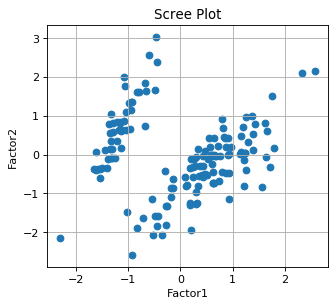

In [15]:
#计算因子得分
irisdf_data_trans = pd.DataFrame(fa.transform(irisdf))
print(irisdf_data_trans)
#以散点图的形式呈现
plt.figure(figsize=(10,4), dpi= 80)
plt.subplot(1,2,1)
plt.scatter(irisdf_data_trans.loc[:,0],irisdf_data_trans.loc[:,1])
plt.title('Scree Plot')
plt.xlabel('Factor1')
plt.ylabel('Factor2')
plt.grid()